In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [4]:
from sklearn.svm import SVC
model = SVC()
from sklearn.cross_validation import train_test_split
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.4,random_state=3)
model.fit(X_train,Y_train)

/home/user/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [5]:
from sklearn import metrics
predicted = model.predict(X_test)
expected = Y_test
print (metrics.accuracy_score(expected,predicted))

0.966666666667


In [6]:
from sklearn import svm
X = iris.data[:,:2]
Y = iris.target
C = 1.0
svc = svm.SVC(kernel='linear',C=C).fit(X,Y)
rbf_svc = svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)
poly_svc = svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)
lin_svc = svm.LinearSVC(C=C).fit(X,Y)
h = 0.02
x_min = X[:,0].min() - 1
x_max = X[:,0].max() + 1

y_min = X[:,1].min() - 1
y_max = X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))


titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

/home/user/anaconda3/lib/python3.5/site-packages/matplotlib/contour.py:919: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


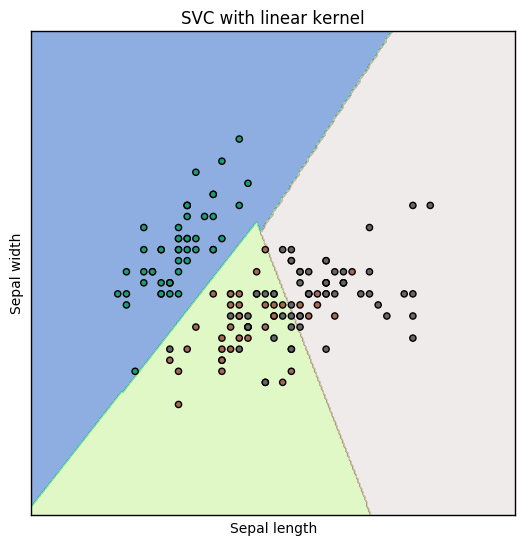

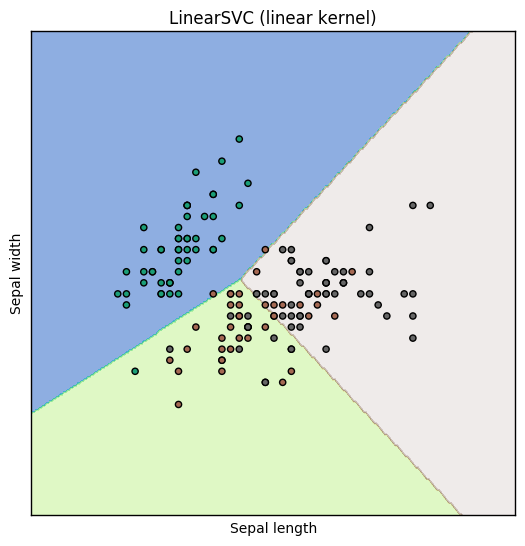

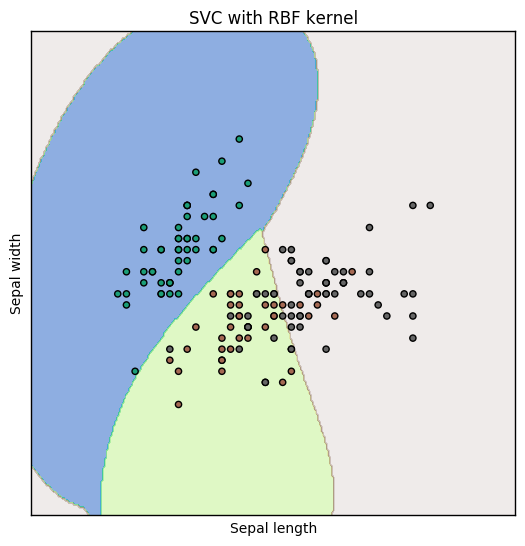

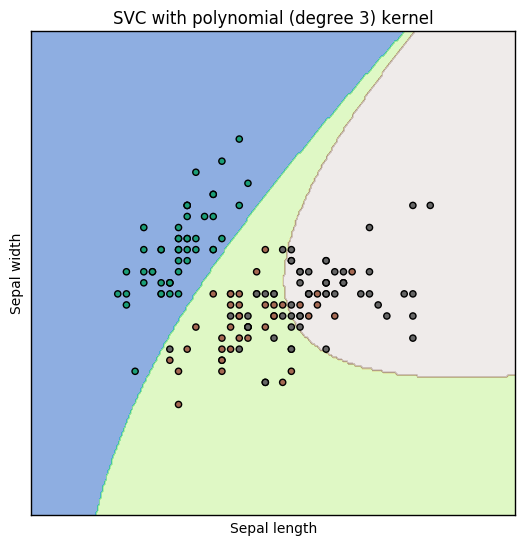

In [7]:
for i,clf in enumerate((svc,lin_svc,rbf_svc,poly_svc)):
    
    plt.figure(figsize=(15,15))
    
    plt.subplot(2,2,i+1)
    
    plt.subplots_adjust(wspace=0.4,hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths = 0)
    
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])